<a href="https://colab.research.google.com/github/qingqingkk/dsl/blob/main/%E2%80%9Cdsl_predict_shares%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting the Popularity of Online News**
**contents**









# **1.Introduction**
The source for the data form [project_dataset](https://drive.google.com/file/d/1QTyU4vNW3WrMIkIQwUtl7cEmm0nVi-IL/view?usp=sharing)

 Several metadata characterizes each record.

Within the archive, you will find the following elements:
* development.csv (development set): a comma-separated values file containing the records from the development set. This portion does have the shares column, which you should use to train and validate your models.
* evaluation.csv(evaluation set):acomma-separatedvaluesfilecontainingtherecordscorresponding to the evaluation set. This portion does not have the shares column.
* sample_submission.csv: a sample submission file.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pandas.plotting import scatter_matrix
from scipy.stats import randint

import seaborn as sns



# Dataset:

**collection**

 Gather a large dataset of news articles, including various features such as.....



In [ ]:
input_file= "/content/drive/MyDrive/dsl/summer_project_dataset/development.csv"
input_file2="/content/drive/MyDrive/dsl/summer_project_dataset/evaluation.csv"
df = pd.read_csv(input_file, header = 0)
eva = pd.read_csv(input_file2, header = 0)
df.head(5)


,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday


Checking the shape of the dataframe (**size** of rows and columns),and the type of the data

In [ ]:
df.shape

(31715, 50)

In [ ]:
df.info

<bound method DataFrame.info of           id                                                url  timedelta  \
0          0  http://mashable.com/2014/09/08/safest-cabbies-...      121.0   
1          1   http://mashable.com/2013/07/25/3d-printed-rifle/      532.0   
2          2  http://mashable.com/2013/10/30/digital-dinosau...      435.0   
3          3  http://mashable.com/2014/08/27/homer-simpson-i...      134.0   
4          4  http://mashable.com/2013/01/10/creepy-robotic-...      728.0   
...      ...                                                ...        ...   
31710  31710  http://mashable.com/2014/11/30/star-wars-guard...       37.0   
31711  31711          http://mashable.com/2014/11/14/uk-floods/       52.0   
31712  31712  http://mashable.com/2014/09/08/paypal-bitcoin-...      121.0   
31713  31713  http://mashable.com/2013/08/23/mashable-androi...      503.0   
31714  31714  http://mashable.com/2014/09/24/designers-dilem...      106.0   

       n_tokens_title  n_tokens

check if the null exist

In [ ]:
df = df.fillna(df.mean())

<ipython-input-82-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


there are 3 variables that contain missing or NULL values.

These variables are a mix of categorical and numerical values. Now let’s review some of the most common methods to deal with these missing values


In [ ]:
df.describe()

,id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.00000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,15857.00000,354.058206,10.390730,544.048179,0.530754,0.970140,0.672973,10.865143,3.274381,4.533899,...,0.095466,0.756271,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863
std,9155.47623,214.314223,2.115643,467.730448,0.137106,0.170203,0.154128,11.295386,3.822364,7.468772,...,0.071362,0.247798,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219
min,0.00000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,7928.50000,163.000000,9.000000,246.000000,0.471276,1.000000,0.626028,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,15857.00000,338.000000,10.000000,409.000000,0.539568,1.000000,0.690909,7.000000,3.000000,1.000000,...,0.100000,0.800000,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,23785.50000,542.000000,12.000000,713.000000,0.608523,1.000000,0.754644,14.000000,4.000000,4.533899,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000
max,31714.00000,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


**Distribution of the attribute**

Data in Histograms

There was quite a lot of categorical variables in the data, represented here by the single high bars in many of the charts.

<function matplotlib.pyplot.show(close=None, block=None)>

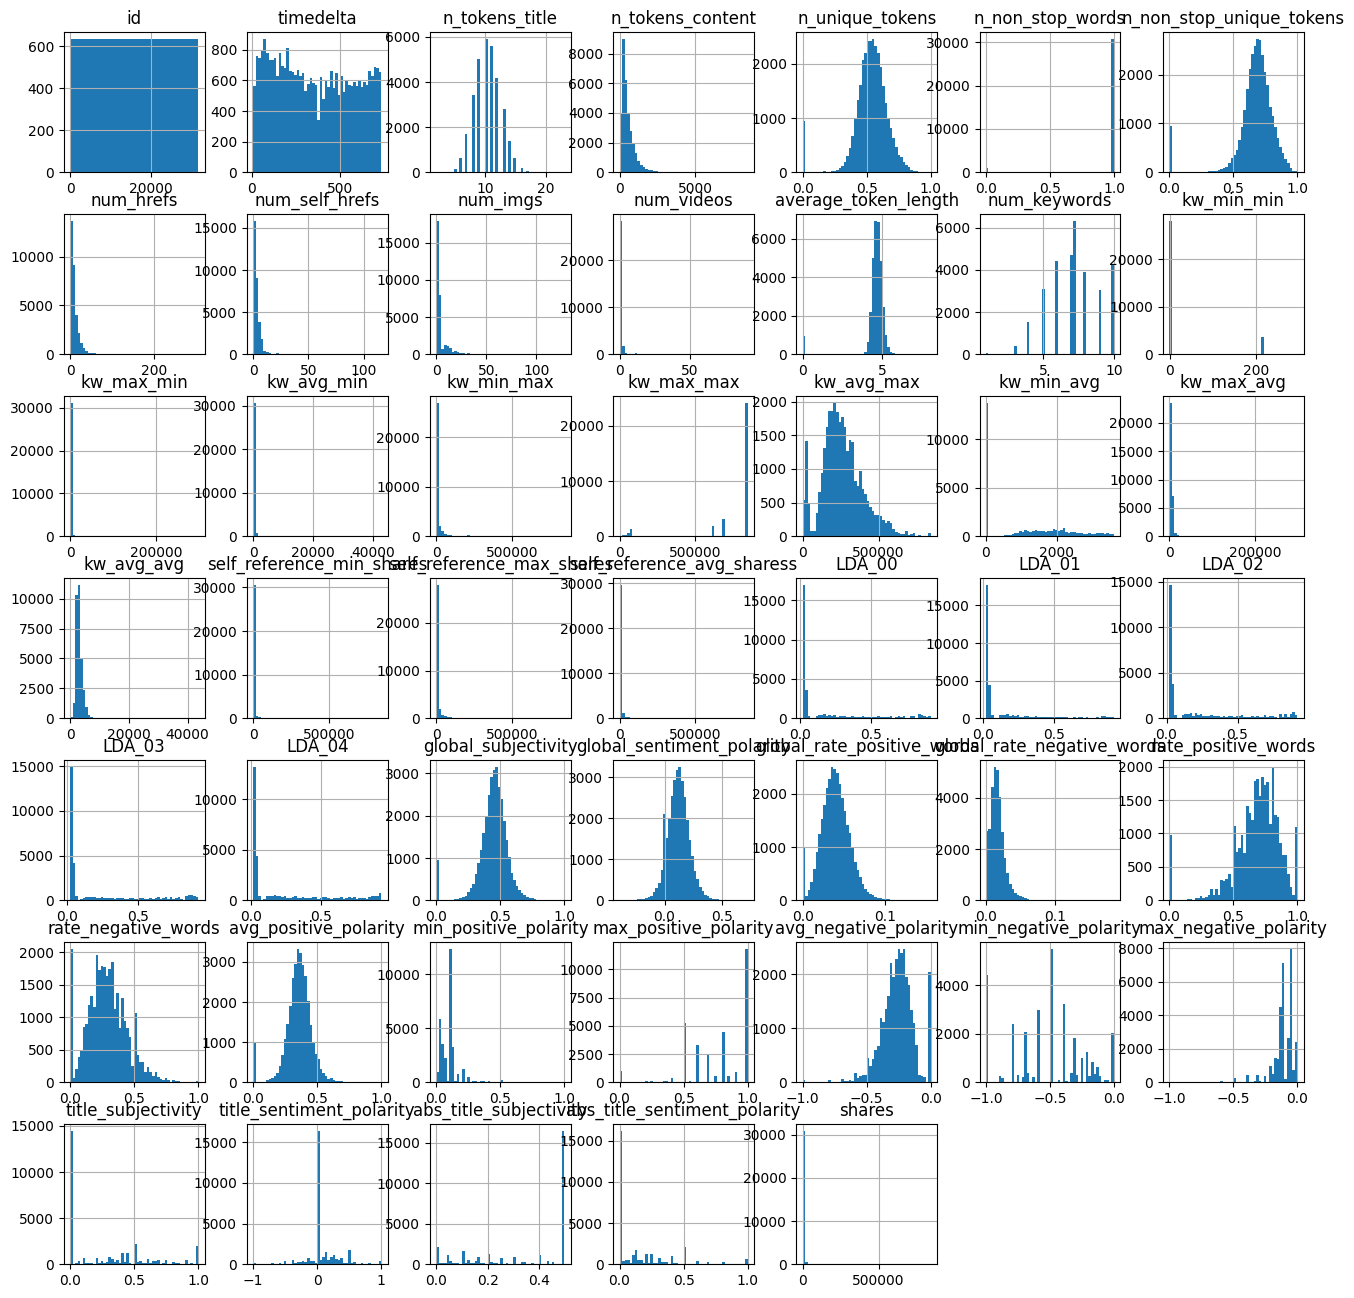

In [ ]:
df.hist(bins=50, figsize= (16,16))
plt.show

# Data quality problems
Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance

Clean and preprocess the data to handle missing values, and convert text into numerical representations,removing noise


**handle missing data**
(not very useful for this project,because the miss data are not related to the feature we need)

Methods of missing data:
1.  Eliminate data objects or variables
2.  estimate
*   Imputation by Mean
*   Imputation by Median
*    KNN
*    MICE (Multiple Imputation by Chained Equations)

3.  ignore

trying two methods:filled with 0 & MICE

In [ ]:

# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Define imputer
imputer = IterativeImputer(random_state=100, max_iter=10)
# Use Numeric Features
df_train = df.loc[:, ["num_imgs", "num_videos", "num_keywords"]]
df_train.head()
imputer.fit(df_train)
df_imputed = imputer.transform(df_train)
df_imputed[:10]
# Replace with imputed values
df.loc[:, ["num_imgs", "num_videos", "num_keywords"]] = df_imputed
df.head(10)

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.00,0.00,0.50,0.00,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.00,0.00,0.50,0.00,1300,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.00,0.00,0.50,0.00,17700,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.40,-0.25,0.10,0.25,1500,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.20,-0.10,0.30,0.10,1400,tech,thursday
5,5,http://mashable.com/2014/11/27/prank-cash-than...,38.0,14.0,322.0,0.567742,1.0,0.668342,4.0,4.0,...,-0.200000,-0.40,-0.100000,0.00,0.00,0.50,0.00,2900,entertainment,monday
6,6,http://mashable.com/2013/01/17/pokki-windows-8-2/,721.0,11.0,250.0,0.576132,1.0,0.671141,2.0,1.0,...,-0.226852,-0.40,-0.125000,0.50,0.50,0.00,0.50,801,tech,thursday
7,7,http://mashable.com/2014/03/20/emma-stone-spic...,294.0,11.0,550.0,0.476636,1.0,0.651466,16.0,6.0,...,-0.309568,-0.50,-0.050000,0.25,0.25,0.25,0.25,3000,tech,thursday
8,8,http://mashable.com/2014/07/28/three-out-of-pr...,163.0,7.0,525.0,0.521154,1.0,0.662722,13.0,1.0,...,-0.235069,-0.60,-0.050000,0.00,0.00,0.50,0.00,1000,bus,tuesday
9,9,http://mashable.com/2014/09/16/robot-cheetah-f...,113.0,11.0,1450.0,0.440868,1.0,0.646572,8.0,7.0,...,-0.232967,-0.60,-0.100000,0.00,0.00,0.50,0.00,367,entertainment,wednesday




**convert text into numerical**

In [ ]:
df_encoded = pd.get_dummies(df['weekday'])

# "Sunday"rename"weekday_is_weekend",like "weekday_is_xxx"，i.e."Monday" is "weekday_is_monday"
df_encoded = df_encoded.add_prefix('weekday_is_')

df_encoded['weekday_is_weekend'] = df_encoded['weekday_is_saturday'] + df_encoded['weekday_is_sunday']

# splited features join into original data
df = pd.concat([df, df_encoded], axis=1)

# delete origin"weekday"col
df = df.drop('weekday',axis=1)

#weekday is over

# get_dummies used to split
df_encoded = pd.get_dummies(df['data_channel'])

# "data_channel" rename "data_channel_is_"，like "data_channel_is_XXX"
df_encoded = df_encoded.add_prefix('data_channel_is_')

# splited characteristics join into origin
df = pd.concat([df, df_encoded], axis=1)

# deletd original"weekday"col
df = df.drop('data_channel',axis=1)
df.shape



(31715, 62)

In [ ]:
eva_encoded = pd.get_dummies(eva['weekday'])

# "Sunday"rename"weekday_is_weekend",like "weekday_is_xxx"，i.e."Monday" is "weekday_is_monday"
eva_encoded = eva_encoded.add_prefix('weekday_is_')

eva_encoded['weekday_is_weekend'] = eva_encoded['weekday_is_saturday'] + eva_encoded['weekday_is_sunday']

# splited features join into original data
eva = pd.concat([eva, eva_encoded], axis=1)

# delete origin"weekday"col
eva = eva.drop('weekday',axis=1)

#weekday is over

# get_dummies used to split
eva_encoded = pd.get_dummies(eva['data_channel'])

# "data_channel" rename "data_channel_is_"，like "data_channel_is_XXX"
eva_encoded = eva_encoded.add_prefix('data_channel_is_')

# splited characteristics join into origin
eva = pd.concat([eva, eva_encoded], axis=1)

# deletd original"weekday"col
eva = eva.drop('data_channel',axis=1)

eva.shape
eva.to_csv("/content/drive/MyDrive/dsl/summer_project_dataset/process_evaluation.csv")




 **Fixing outliers(remove noise)**

 Outliers can be detected through


*   Univariate analysis:
Boxplot,
Percentiles,
Histograms,
GESD
*   Multivariate analysis:
DBSCAN

choose Histograms below

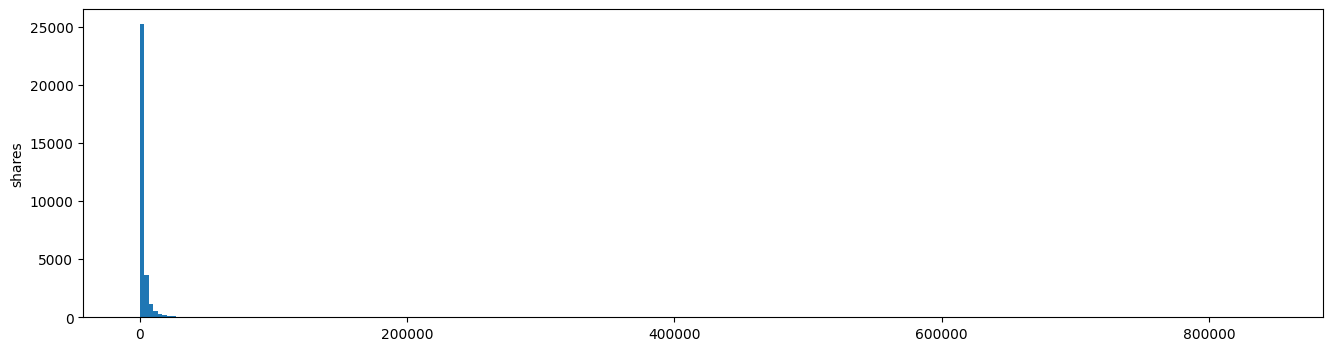

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

x = df['shares']
plt.hist(x,bins=250)
plt.ylabel('shares');

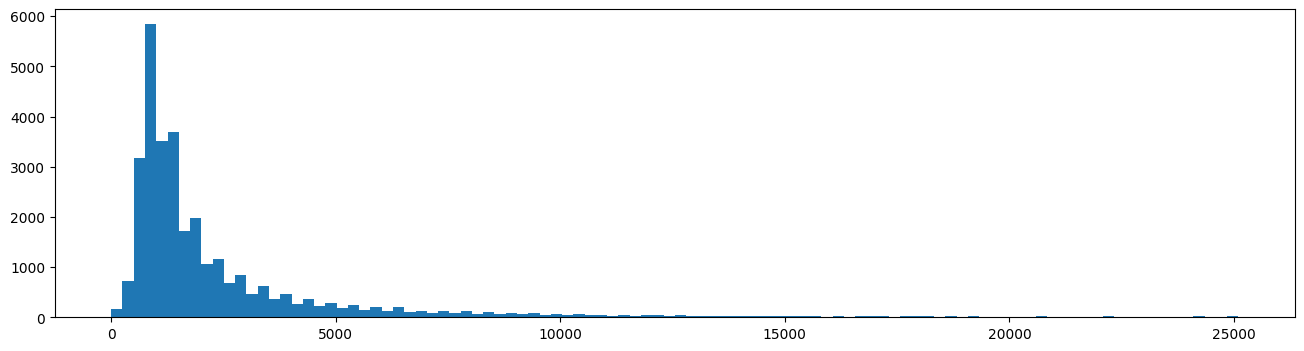

(31254, 1)

In [ ]:
def reject_outliers(shares):
    u = np.median(df['shares'])
    s = np.std(df['shares'])
    filtered= [e for e in (df['shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
#plt.rcParams["figure.figsize"] = fig_size

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

df_shares = pd.DataFrame(filtered)
df_shares.shape  ##original shape(31725,50)

In [ ]:
print(np.median(df['shares']))
print(np.std(df['shares']))

1400.0
11899.272617396875


In [ ]:
print(1400+11899*2)

25198


31715 emoved 461 outliers （1.5%）

 **Creating a new data set without outliers**

Let's create a new dataframe - df2 - where outliers are rejected
We define an outlier as a value of 'shares' which is outside two standard deviations 1400+2*11899=25198

We obviously consider only the upper bound, which is a positive number. The mean minus two standard deviations would result in a negative number, and it's not possible to have a negative number of 'shares'.

Checking the shape of the new dataframe; number of rows and columns.






In [ ]:
df2= df[df['shares']<25198]
df2.shape
df2.to_csv("/content/drive/MyDrive/dsl/summer_project_dataset/process_development.csv")

# Feature engneering

**features' correlation with "share"**

Next a look at the variables' correlations, numerically and graphically.

In [ ]:
corrmat = df2.corr()
corrmat['shares'].sort_values(ascending=False)

<ipython-input-87-0267da233bba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr()


shares                           1.000000
kw_avg_avg                       0.185348
data_channel_is_lifestyle        0.143140
LDA_03                           0.123185
kw_max_avg                       0.096107
                                   ...   
data_channel_is_entertainment   -0.044361
data_channel_is_bus             -0.044682
n_non_stop_unique_tokens        -0.050264
data_channel_is_world           -0.101390
LDA_02                          -0.117133
Name: shares, Length: 61, dtype: float64



**Correlation matrix**

Correlations between the variables and the label 'shares'


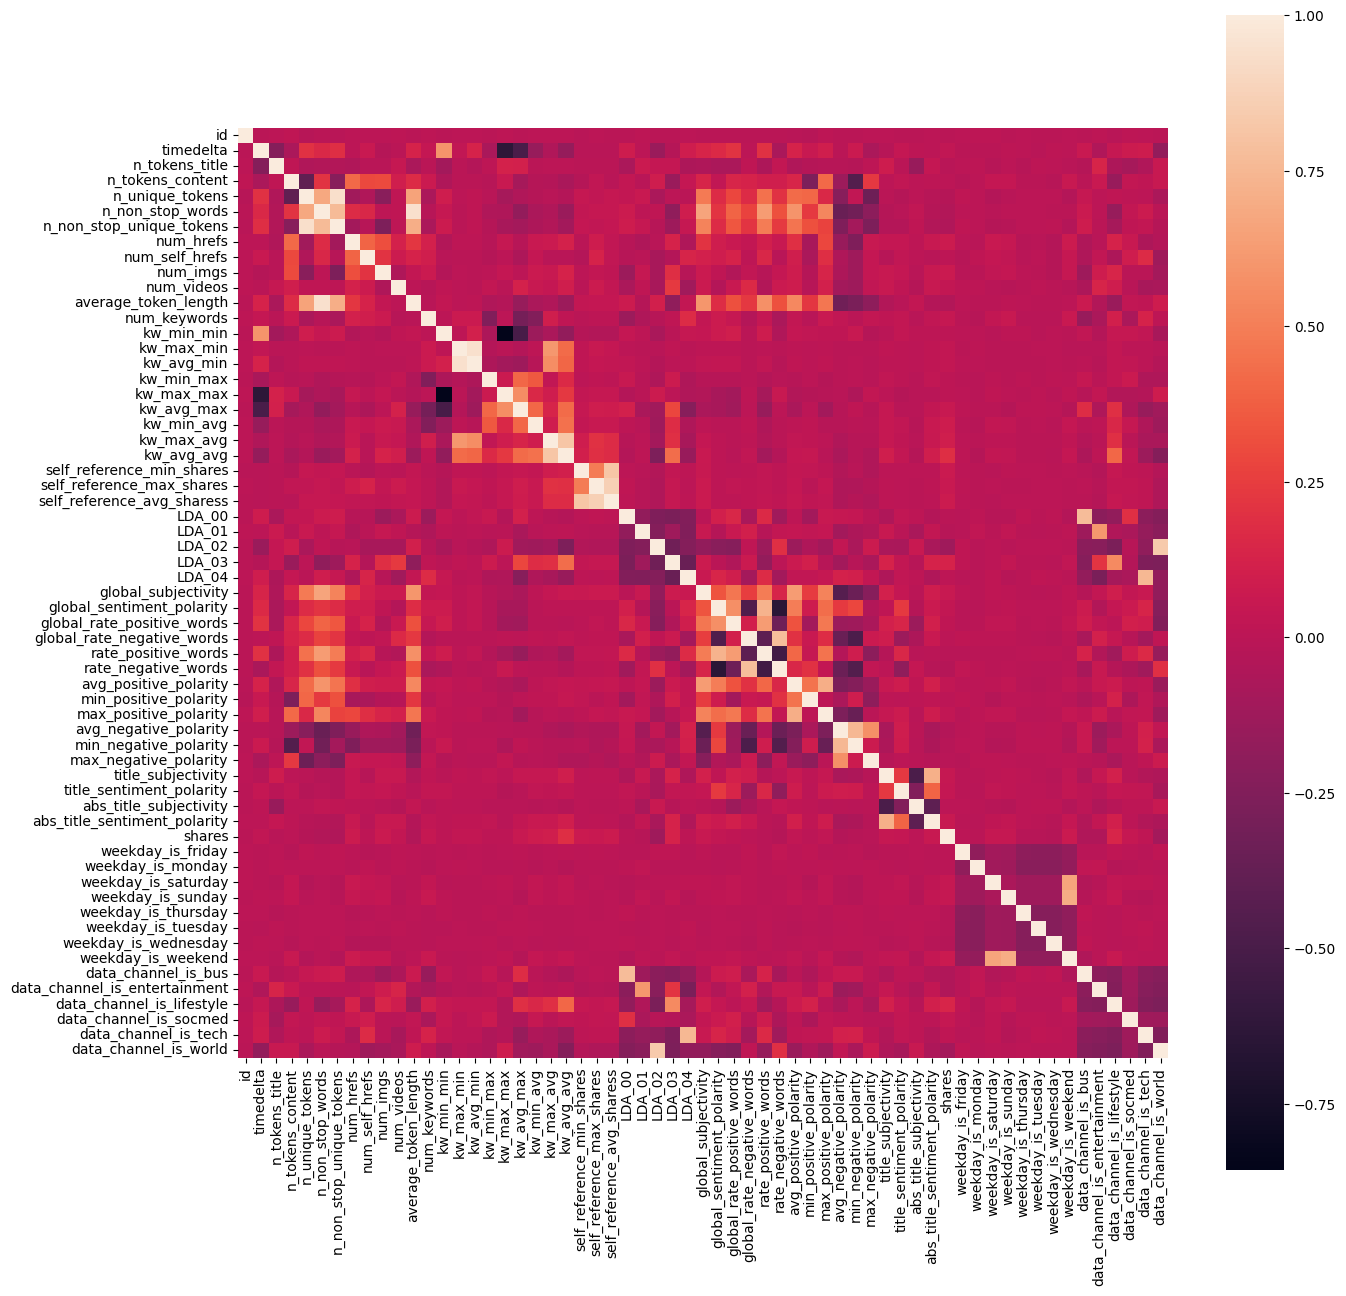

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

Top 15 of most correlated features' and their types:

kw_avg_avg
data_channel_is_lifestyle
LDA_03
kw_max_avg
kw_min_avg
num_hrefs
num_imgs
self_reference_avg_sharess
weekday_is_weekend
self_reference_min_shares
self_reference_max_shares
global_subjectivity
kw_avg_max
abs_title_sentiment_polarity
num_keywords

Scatter matrices - 15 most correlated features

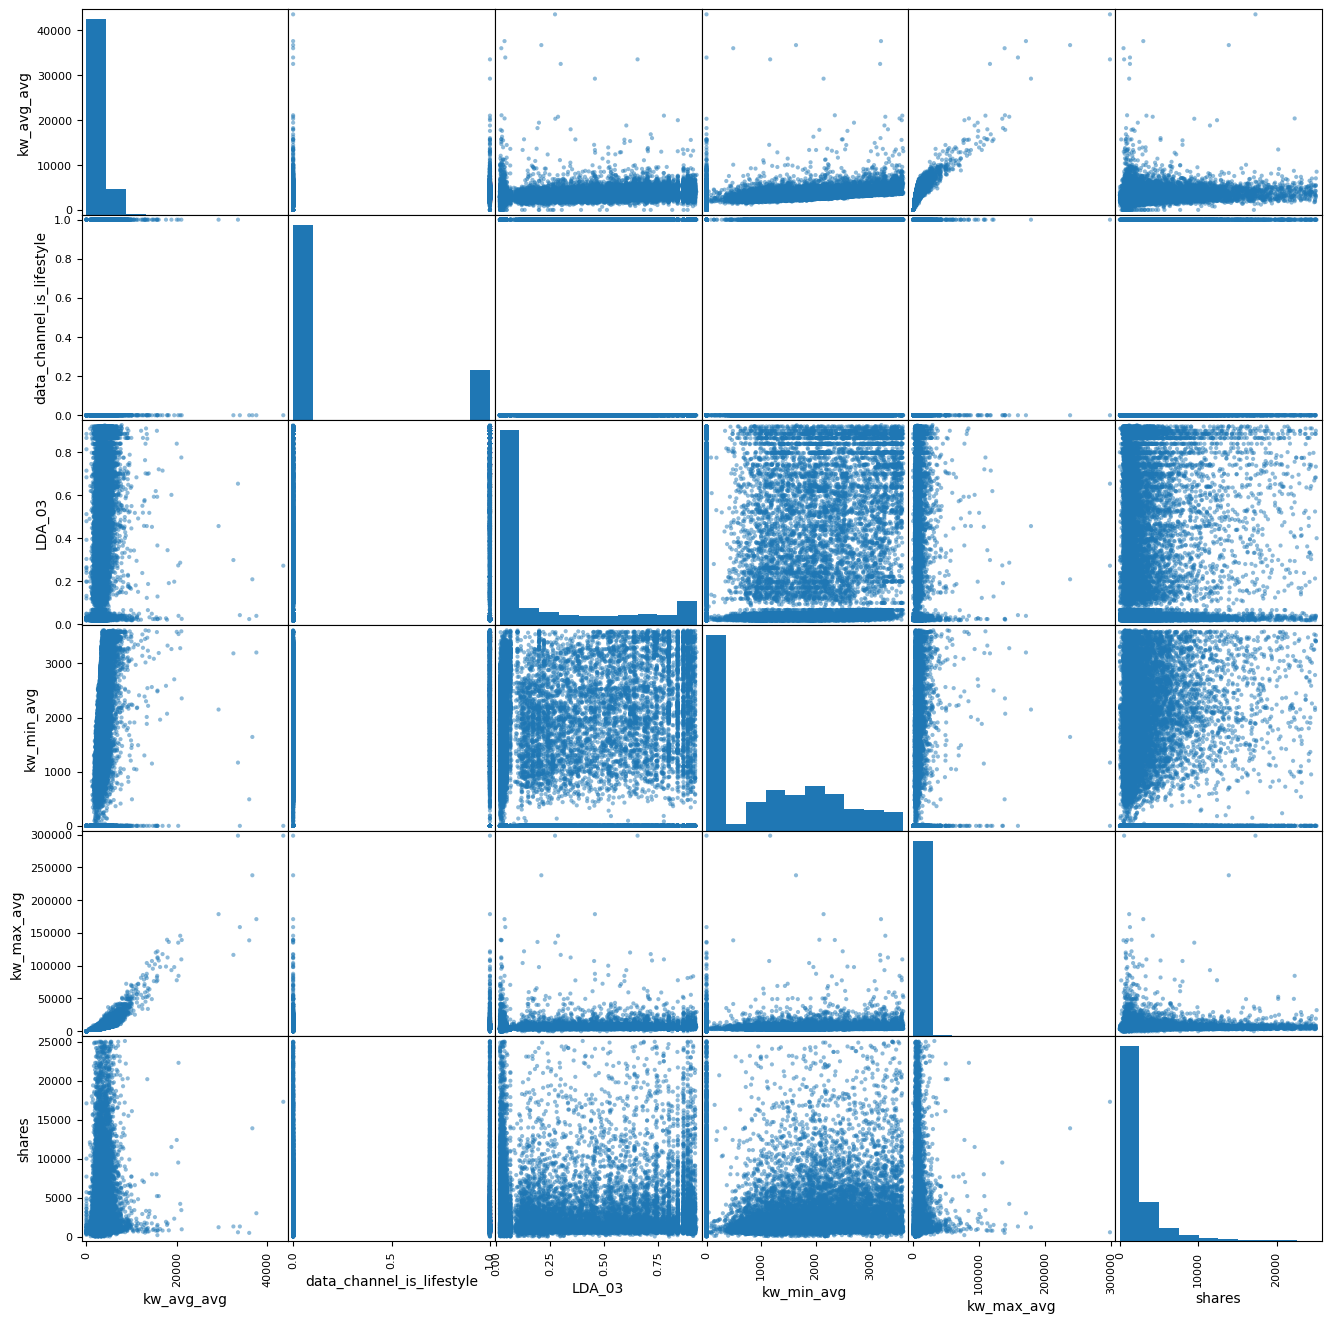

In [ ]:
attributes = ['kw_avg_avg','data_channel_is_lifestyle','LDA_03','kw_min_avg','kw_max_avg',"shares"]
scatter_matrix(df2[attributes], figsize=(16, 16));

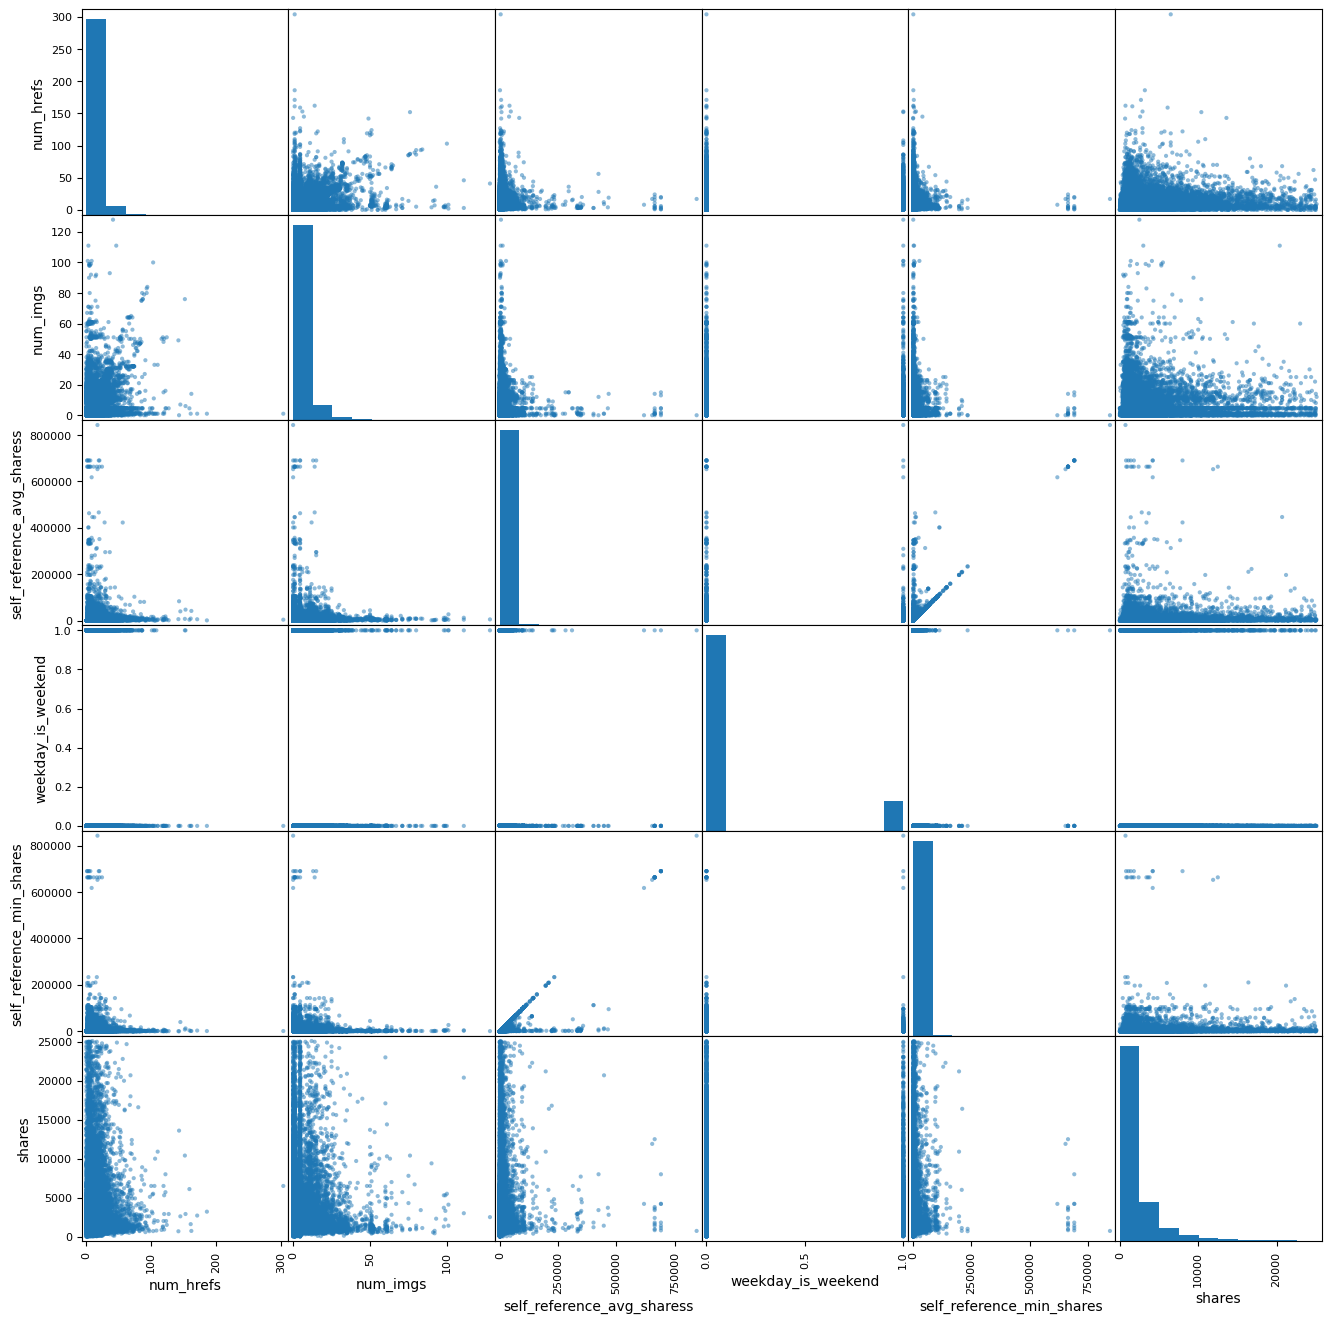

In [ ]:
attributes = ['num_hrefs','num_imgs','self_reference_avg_sharess','weekday_is_weekend','self_reference_min_shares',"shares"]
scatter_matrix(df2[attributes], figsize=(16, 16));

kw_avg_max                      0.052166
abs_title_sentiment_polarity    0.050698
num_keywords                    0.049694
title_subjectivity              0.044959
title_sentiment_polarity

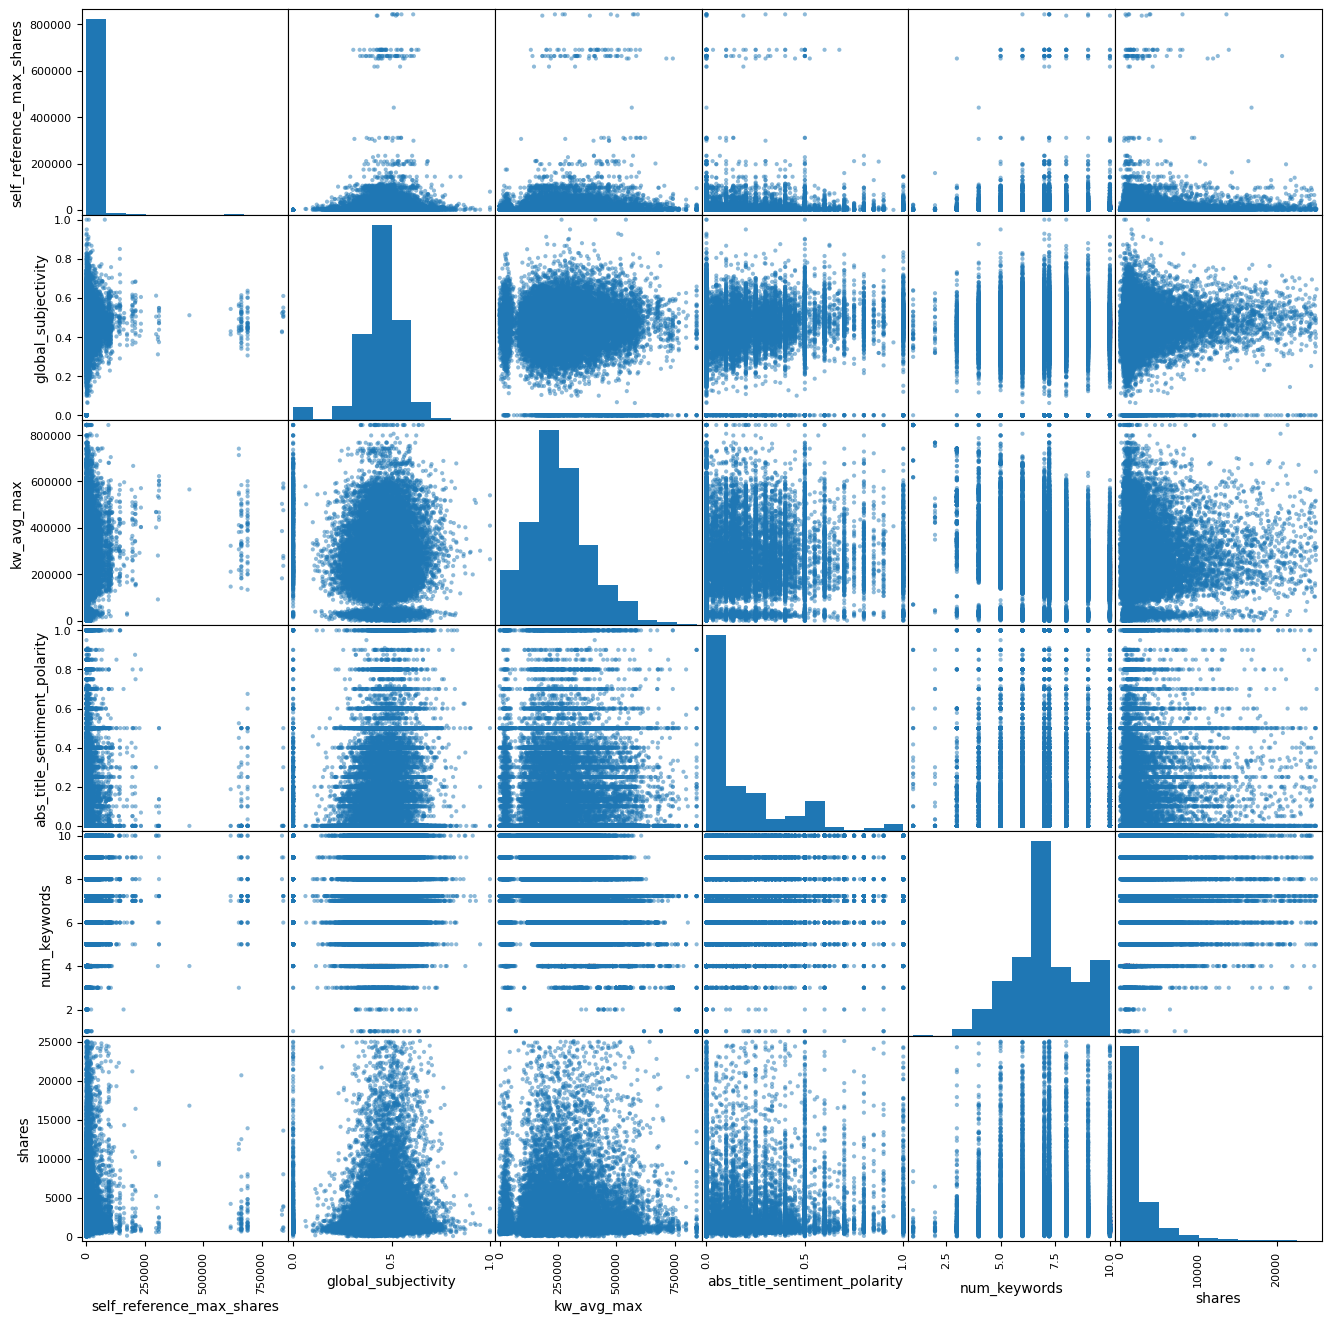

In [ ]:
attributes = ['self_reference_max_shares','global_subjectivity','kw_avg_max','abs_title_sentiment_polarity','num_keywords',"shares"]
scatter_matrix(df2[attributes], figsize=(16,16));

# Label Generation

In [ ]:
train_set, test_set = train_test_split(df2, test_size=0.20, random_state=42)

x_train_set= train_set.drop(['url','shares'], axis=1) #Dropping both 'shares', the predicted variable and 'url', a text variable
y_train_set = train_set['shares']

x_test_set = test_set.drop(['url','shares'], axis=1)
y_test_set = test_set['shares']
##high correlation filter

# Model Selection

# Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_set, y_train_set)

LinearRegression()

In [ ]:
some_X_data = x_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(lin_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,20000,1995.458925
1,1800,1927.566480
2,5200,3200.081251
3,5300,5502.565925
4,761,1893.185221


worse 5 rows

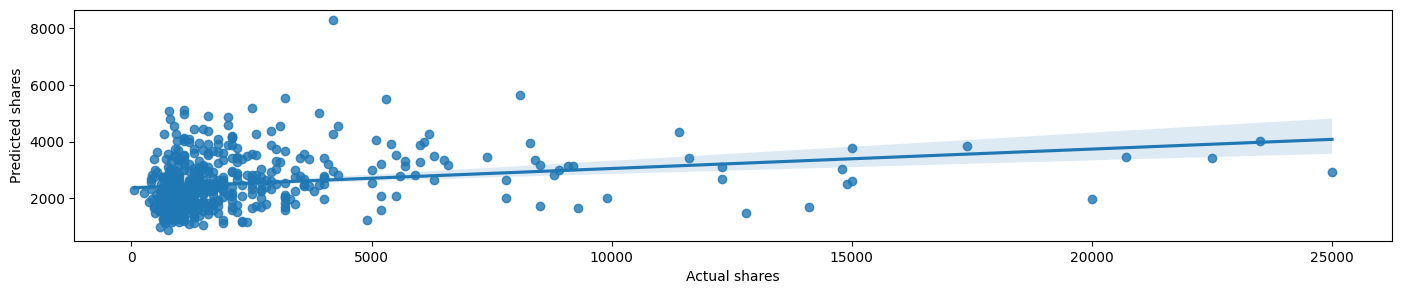

In [ ]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual shares"], y=df_someXdata_LR["Predicted shares"])
plt.show()

 **Linear Regression-RMSE and MAE for the Training set**

In [ ]:
share_predictions = lin_reg.predict(x_train_set)
lin_mse = mean_squared_error(y_train_set, share_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

3127.833388442277

In [ ]:
df2['shares'].median() #with outliers: 1400

1400.0

The median is 1400. The model with its RMSE around 3300 is clearly underfitting the training data. This can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough.
The main ways to fix the model in this case are to

* select a more powerful model
* feed the training algorithm with better features

Let's check also the Mean Absolute Error - MAE

In [ ]:
lin_mae = mean_absolute_error(y_train_set, share_predictions)
print(lin_mae)

1839.0790130034673


**Cross Validation - Linear Regression**

In [ ]:
lin_scores = cross_val_score(lin_reg, x_train_set, y_train_set,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores) #with outliers:mean 13185 std 7605

Scores: [3228.67182993 3200.09317772 3016.04654746 3052.65902884 2945.58914523
 3152.57614082 3131.7843959  3023.57616211 3210.11828106 3385.93611592]
Mean: 3134.705082497895
Standard deviation: 122.948492451711


After Cross Validation also Linear Regression looks worse. The Decision Tree model still clearly beats the Linear Regression especially based on the Standard Deviation, although only 10 distinct subsets (cv=10) were used.

# Decision Tree

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train_set, y_train_set)

DecisionTreeRegressor(random_state=42)

In [ ]:
some_X_data = x_train_set.iloc[:5]
some_y_data = y_train_set.iloc[:5]
print("Predicted shares:", tree_reg.predict(some_X_data))
print("Actual shares:", list(some_y_data))

Predicted shares: [20000.  1800.  5200.  5300.   761.]
Actual shares: [20000, 1800, 5200, 5300, 761]


And now we have a Decision Tree model! The predictions based on the initial small sample of 5 have zero errors so clearly there's something strange here. Let's investigate further.

**Decision Tree - RMSE and MAE for the Training Set**

In [ ]:
share_predictions = tree_reg.predict(x_train_set)
tree_mse = mean_squared_error(y_train_set, share_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
tree_mae = mean_absolute_error(y_train_set, share_predictions)
print(tree_mae)

0.0
0.0


No error at all; RMSE and MAE equal zero!! The results seem to indicate we have a perfect model! The likely explanation, though, is that the model has badly overfit the data

**Cross Validation - Decision Tree**

In [ ]:
scores = cross_val_score(tree_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [4635.72868531 4716.54415102 4594.1362897  4593.08166193 4524.72146802
 4714.08407706 4737.30065105 4634.56197097 4543.4453224  4823.96251735]
Mean: 4651.756679481235
Standard deviation: 89.57648086911954


Now the RMSE for a Decision Tree's predictions does not look that good anymore
Let's try next a Random Forest model.

# 8. Random Forest

cons:complexity,2 minutes and cross valiadation

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train_set, y_train_set)

RandomForestRegressor(random_state=42)

In [ ]:
some_X_data = x_train_set.iloc[:500]
some_y_data = y_train_set.iloc[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(forest_reg.predict(some_X_data),list(some_y_data) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head()

,Actual shares,Predicted shares
0,20000,13862.19
1,1800,2590.67
2,5200,3992.07
3,5300,5357.38
4,761,1819.05


Testing the Random Forest model with the same sample size,500 , from the Training set looks already quite good! However, since this is before cross validation there's always a risk of overfitting.

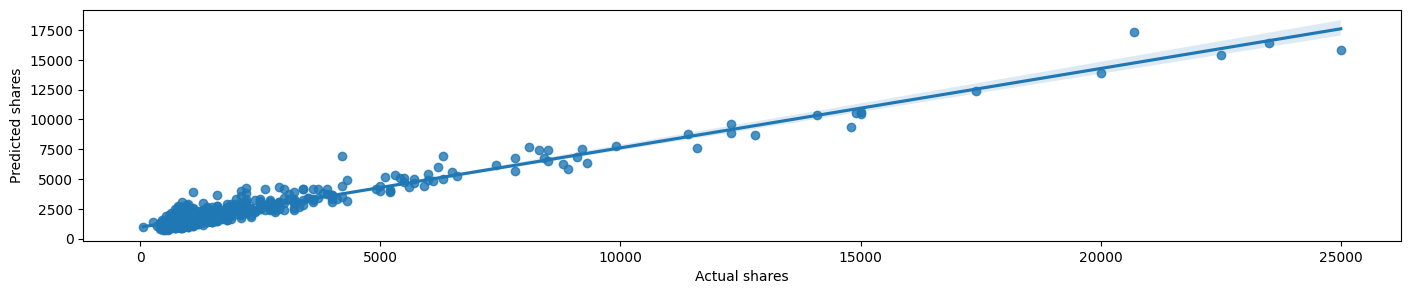

In [ ]:
f, ax = plt.subplots(figsize=(17, 3))
sns.regplot(x=df_someXdata_LR["Actual shares"], y=df_someXdata_LR["Predicted shares"])
plt.show()

**Random Forest - RMSE and MAE for the Training Set**

In [ ]:
share_predictions = forest_reg.predict(x_train_set)
forest_mse = mean_squared_error(y_train_set, share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

1192.991708535289

In [ ]:
forest_mae = mean_absolute_error(y_train_set, share_predictions)
print(forest_mae) #with outliers:1424

728.8547622285324


**Cross Validation - Random Forest**

In [ ]:
scores = cross_val_score(forest_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [3271.87009669 3200.19154557 3069.4466204  3133.05365394 2997.43751561
 3260.82210961 3166.80687246 3100.87591533 3236.85284734 3354.57555379]
Mean: 3179.1932730747517
Standard deviation: 101.62289996509661


the results after Cross Validation are getting worse.

# **Hyperparameters tuning**

**Finding the optimal number of hyperparameters**

**Grid Search**

Since Random Forest was the most promising model we start fine-tuning it. We can use Grid Search instead of fiddling with hyperparameters manually

In [ ]:
param_grid = [
     {'n_estimators': [3,10], 'max_features':[2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")

grid_search.fit(x_train_set, y_train_set)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4], 'n_estimators': [3, 10]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [ ]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3632.606111610188 {'max_features': 2, 'n_estimators': 3}
3289.4934470951775 {'max_features': 2, 'n_estimators': 10}
3621.7675805737786 {'max_features': 3, 'n_estimators': 3}
3295.537740990344 {'max_features': 3, 'n_estimators': 10}
3634.8694674582393 {'max_features': 4, 'n_estimators': 3}
3284.6310888786466 {'max_features': 4, 'n_estimators': 10}
3613.872866193724 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3258.201455143192 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3634.232371508803 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3271.5625464985023 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
3663.2678648742703 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
3264.6656484444725 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [ ]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}


Through Grid Search we would get the optimal model with

max_features = 3, which here determines the maximum number of features to consider while looking for a split at a leaf

n_estimators = 10, which here is the number of trees to be used in the forest



**Randomized Search**


In [ ]:
param_distribs = {
        'n_estimators': randint(low=1, high=20),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train_set, y_train_set)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f39ec0b4280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f39ec0b7250>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3240.42439713717 {'max_features': 7, 'n_estimators': 15}
3303.995706230112 {'max_features': 3, 'n_estimators': 8}
3350.2031939177723 {'max_features': 5, 'n_estimators': 7}
3182.998344406694 {'max_features': 2, 'n_estimators': 19}
3284.8621573314954 {'max_features': 7, 'n_estimators': 11}
3506.7154161521044 {'max_features': 3, 'n_estimators': 4}
3909.2939257776775 {'max_features': 3, 'n_estimators': 2}
3386.007460012335 {'max_features': 4, 'n_estimators': 6}
4478.940393086142 {'max_features': 2, 'n_estimators': 1}
3254.7237306996035 {'max_features': 4, 'n_estimators': 12}


In [ ]:
print(rnd_search.best_params_)

{'max_features': 2, 'n_estimators': 19}


# Final Model with the Test Set

In [ ]:
final_model = rnd_search.best_estimator_

final_predictions = final_model.predict(x_test_set)

final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3160.739434361642

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(x_test_set)

final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3250.10022872165

# Prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

model= RandomForestRegressor(
           max_features=2,
           n_estimators=19,random_state=42,)


input_file2 = "/content/drive/MyDrive/dsl/summer_project_dataset/process_evaluation.csv"
test_set = pd.read_csv(input_file2, header = 0)
test_set = test_set.fillna(df.mean())
input_file3 = '/content/drive/MyDrive/dsl/summer_project_dataset/sample_submission.csv'
y_test = pd.read_csv(input_file3, header = 0)
y_test = y_test['Predicted']
x_test = test_set.drop(['Unnamed: 0','url'], axis=1)

model.fit(x_train_set, y_train_set)
y_pred = model.predict(x_test)

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)

result_df = pd.DataFrame({'Predicted': y_pred,'Id': test_set['id']})

result_df.to_csv('predictions.csv', index=False)



<ipython-input-50-238df9b2b6b9>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_set = test_set.fillna(df.mean())


2283.5785043127785



# Deep learning model
 we use FNN model is to approximate a mapping function from input variables to output variables. It learns to make predictions by iteratively adjusting the weights and biases of its neurons based on the provided training data.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
input_file1 = "/content/drive/MyDrive/dsl/summer_project_dataset/process_development.csv"
train_set = pd.read_csv(input_file1, header=0)

# Split the data into input features (x) and target variable (y)
x_train = train_set.drop(['url', 'id', 'shares'], axis=1)
y_train = train_set['shares']

# Fill missing values
x_train = x_train.fillna(x_train.mean())

# Standardize the input features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Define the FNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=16)

# Load the test dataset
input_file2 = "/content/drive/MyDrive/dsl/summer_project_dataset/process_evaluation.csv"
test_set = pd.read_csv(input_file2, header=0)

# Preprocess the test dataset
x_test = test_set.drop(['url', 'id'], axis=1)
x_test = x_test.fillna(x_train.mean())
x_test = scaler.transform(x_test)

# Make predictions on the test dataset
y_pred = model.predict(x_test)

# Evaluate the predictions
input_file3 = '/content/drive/MyDrive/dsl/summer_project_dataset/sample_submission.csv'
y_test = pd.read_csv(input_file3, header=0)['Predicted']
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Save the predictions to a CSV file
result_df = pd.DataFrame({'Id': test_set['id'], 'Predicted': y_pred.flatten()})
result_df.to_csv('predictions.csv', index=False)

Epoch 1/50
1954/1954 [==============================] - 6s 2ms/step - loss: 11248409.0000
Epoch 2/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9917966.0000
Epoch 3/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9837588.0000
Epoch 4/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9788521.0000
Epoch 5/50
1954/1954 [==============================] - 5s 2ms/step - loss: 9757957.0000
Epoch 6/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9730936.0000
Epoch 7/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9709774.0000
Epoch 8/50
1954/1954 [==============================] - 4s 2ms/step - loss: 9687952.0000
Epoch 9/50
1954/1954 [==============================] - 4s 2ms/step - loss: 9671434.0000
Epoch 10/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9652790.0000
Epoch 11/50
1954/1954 [==============================] - 3s 2ms/step - loss: 9640617.0000
Epoch 12/50
1954/1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Load the dataset
input_file1 = "/content/drive/MyDrive/dsl/summer_project_dataset/process_development.csv"
train_set = pd.read_csv(input_file1, header=0)

# Split the data into input features (x) and target variable (y)
x_train = train_set.drop(['url', 'id', 'shares'], axis=1)
y_train = train_set['shares']

# Fill missing values
x_train = x_train.fillna(x_train.mean())

# Standardize the input features
scaler = StandardScaler()


x_train = scaler.fit_transform(x_train)

# Define the FNN model
def create_model(units=64):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=x_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Wrap the Keras model inside the KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'units': [32, 64, 128],
    'batch_size': [16, 32],
    'epochs': [20,50,100]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best hyperparameters and MSE score
print("Best Hyperparameters: ", grid_result.best_params_)
print("Best MSE Score: ", -grid_result.best_score_)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
